In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [84]:
data= pd.read_csv('/content/kmeans_data.txt', delim_whitespace=True, header=None)
x_d= np.array(data[0])
y_d= np.array(data[1])

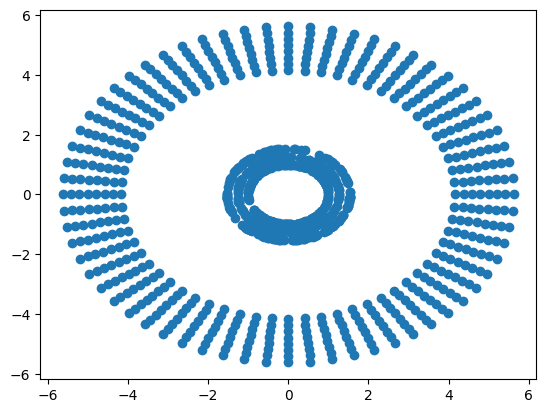

In [85]:
#Let's see how original dataset look like
plt.figure()
plt.scatter(x_d,y_d)
plt.show()

In [86]:
def distance(a,b):
  dist = np.zeros((a.shape[0],b.shape[0]))
  for i in range(b.shape[0]):
    dist[ : , i ]= (np.square(a - b[i])).reshape(-1)
  return dist

In [87]:
def assign(points, means):
  dist= distance(points,means)
  color= np.argmin(dist,axis=1)
  return color.reshape(-1,1)

In [88]:
def mean(points, color):
  m = np.zeros((2,points.shape[1]))
  m[0]= np.mean(points[color==0],axis=0)
  m[1]= np.mean(points[color==1],axis=0)
  return m

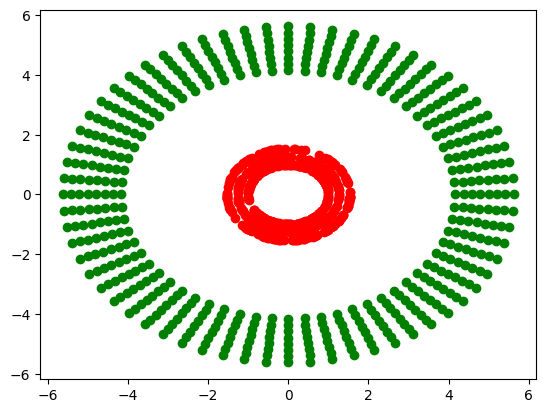

In [90]:
phi_d = (np.square(x_d) + np.square(y_d)).reshape(-1,1) #feature transformation
mean_ini= phi_d[:2,:]
color= assign(phi_d, mean_ini)

for i in range(10):
  mean_ini = mean(phi_d,color)
  color = assign(phi_d,mean_ini)

color=color.reshape(color.shape[0])
x0= x_d[color==0]
y0= y_d[color==0]
x1= x_d[color==1]
y1= y_d[color==1]

plt.scatter(x0,y0, c='r')
plt.scatter(x1,y1, c='g')
plt.show()